In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from datetime import datetime

In [2]:
# df = pd.read_csv('train.csv', thousands = '.')
df = pd.read_csv('train.csv')
df

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1456,20211227,3.830,3.416,2.908,2.350
1457,20211228,4.510,3.890,3.714,2.700
1458,20211229,4.490,3.524,3.660,2.524
1459,20211230,4.444,3.574,3.530,2.506


In [3]:
print(df[df['일시'] == 20190907])

           일시  광진구  동대문구  성동구  중랑구
614  20190907  0.0   0.0  0.0  0.0


In [4]:
print(df[df['일시'] == 20190906])
print(df[df['일시'] == 20190908])

           일시   광진구   동대문구    성동구    중랑구
613  20190906  2.02  1.396  1.504  1.024
           일시   광진구   동대문구    성동구    중랑구
615  20190908  5.83  2.658  4.188  2.482


In [5]:
df.loc[614] = [20190907, 3.93, 2.027, 2.846, 1.753]
print(df[613:616])

           일시   광진구   동대문구    성동구    중랑구
613  20190906  2.02  1.396  1.504  1.024
614  20190907  3.93  2.027  2.846  1.753
615  20190908  5.83  2.658  4.188  2.482


In [6]:
df1 = pd.read_csv('서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv', encoding='cp949', thousands = ',')
df2 = pd.read_csv('서울특별시 공공자전거 일별 대여건수(2019.4_5).csv', thousands = ',')
df3 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_20190601_20191130.csv', thousands = ',')
df4 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_2019.12.01_2020.05.31.csv', thousands = ',')
df5 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_2020.06.01_2020.06.30.csv', thousands = ',')
df6 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_2020.07.01_2021.01.31.csv', encoding='cp949', thousands = ',')
df7 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_21.02.01_21.06.30.csv', encoding='cp949', thousands = ',')
df8 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_21.07-21.12.csv', encoding='cp949', thousands = ',')
df3

,대여일시,대여건수
0,2019-06-01,79878
1,2019-06-02,77091
2,2019-06-03,82911
3,2019-06-04,83576
4,2019-06-05,81515
...,...,...
177,2019-11-26,52464
178,2019-11-27,46248
179,2019-11-28,46983
180,2019-11-29,44689


In [7]:
print(df3[df3['대여일시'] == '2019-09-06'])
print(df3[df3['대여일시'] == '2019-09-08'])

          대여일시   대여건수
97  2019-09-06  16631
          대여일시   대여건수
98  2019-09-08  52055


In [8]:
typhoon = pd.DataFrame([['2019-09-07',34343]],columns=df3.columns)
df3 = pd.concat([df3.iloc[:98], typhoon, df3.iloc[98:]], ignore_index = True)
print(df3[97:100])

          대여일시   대여건수
97  2019-09-06  16631
98  2019-09-07  34343
99  2019-09-08  52055


In [9]:
in_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
in_df = in_df.drop(['대여일자','대여일시'],axis=1)
in_df.reset_index(inplace=True,drop=True)

In [10]:
print(df.info())
print(in_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      1461 non-null   int64  
 1   광진구     1461 non-null   float64
 2   동대문구    1461 non-null   float64
 3   성동구     1461 non-null   float64
 4   중랑구     1461 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 57.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   대여건수    1461 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None


In [11]:
# df = pd.concat([df,in_df],axis=1)
# df

In [12]:
df = df.drop(['동대문구','성동구','중랑구'],axis=1)
df['광진구'] = df['광진구']*1000
df = df.astype({'광진구': 'int'})
df

,일시,광진구
0,20180101,592
1,20180102,840
2,20180103,828
3,20180104,792
4,20180105,818
...,...,...
1456,20211227,3830
1457,20211228,4510
1458,20211229,4490
1459,20211230,4444


In [13]:
df.columns = ['date','Gwangjin-gu']

In [14]:
weather = pd.read_csv('weather_test.csv', encoding='cp949')
weather

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),10분 최다 강수량(mm),1시간 최다강수량(mm),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일조시간(hr),합계 일사량(MJ/m2),일 최심적설(cm),평균 전운량(1/10),평균 지면온도(°C),안개 계속시간(hr)
0,108,서울,2018-01-01,-1.3,-5.1,3.8,NaN,NaN,NaN,7.0,3.8,1.4,39.1,9.6,8.3,6.14,NaN,1.0,-1.7,NaN
1,108,서울,2018-01-02,-1.8,-4.3,1.8,NaN,NaN,NaN,8.5,4.9,1.8,42.0,9.6,7.9,5.36,NaN,2.3,-2.3,NaN
2,108,서울,2018-01-03,-4.7,-7.1,-0.4,NaN,NaN,NaN,6.6,3.5,2.2,42.3,9.7,8.6,6.56,NaN,3.6,-3.4,NaN
3,108,서울,2018-01-04,-4.7,-8.7,-0.7,NaN,NaN,NaN,5.8,3.5,1.4,43.0,9.7,6.2,4.73,NaN,6.5,-3.3,NaN
4,108,서울,2018-01-05,-3.0,-5.6,1.6,NaN,NaN,NaN,8.0,3.6,1.7,48.4,9.7,8.2,5.96,NaN,3.6,-2.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,108,서울,2021-12-27,-7.6,-12.9,-3.9,NaN,NaN,0.0,5.5,3.1,1.7,60.9,9.6,3.8,6.09,NaN,3.1,-4.7,NaN
1457,108,서울,2021-12-28,-4.1,-8.5,-0.9,NaN,NaN,NaN,4.9,3.1,2.2,73.8,9.6,1.7,4.32,NaN,4.1,-3.3,NaN
1458,108,서울,2021-12-29,0.4,-3.8,5.9,NaN,NaN,0.2,10.8,5.9,2.6,72.9,9.6,1.8,4.64,0.3,5.1,-0.7,NaN
1459,108,서울,2021-12-30,-3.9,-6.8,0.2,NaN,NaN,0.0,12.3,6.6,3.3,48.5,9.6,7.3,9.14,NaN,2.0,-2.7,NaN


In [15]:
weather = weather.drop(['지점','지점명','일시'],axis=1)
weather = weather.fillna(0)
weather.head()

,평균기온(°C),최저기온(°C),최고기온(°C),10분 최다 강수량(mm),1시간 최다강수량(mm),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일조시간(hr),합계 일사량(MJ/m2),일 최심적설(cm),평균 전운량(1/10),평균 지면온도(°C),안개 계속시간(hr)
0,-1.3,-5.1,3.8,0.0,0.0,0.0,7.0,3.8,1.4,39.1,9.6,8.3,6.14,0.0,1.0,-1.7,0.0
1,-1.8,-4.3,1.8,0.0,0.0,0.0,8.5,4.9,1.8,42.0,9.6,7.9,5.36,0.0,2.3,-2.3,0.0
2,-4.7,-7.1,-0.4,0.0,0.0,0.0,6.6,3.5,2.2,42.3,9.7,8.6,6.56,0.0,3.6,-3.4,0.0
3,-4.7,-8.7,-0.7,0.0,0.0,0.0,5.8,3.5,1.4,43.0,9.7,6.2,4.73,0.0,6.5,-3.3,0.0
4,-3.0,-5.6,1.6,0.0,0.0,0.0,8.0,3.6,1.7,48.4,9.7,8.2,5.96,0.0,3.6,-2.6,0.0


In [16]:
df = pd.concat([df,weather],axis=1)
df.head()

,date,Gwangjin-gu,평균기온(°C),최저기온(°C),최고기온(°C),10분 최다 강수량(mm),1시간 최다강수량(mm),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일조시간(hr),합계 일사량(MJ/m2),일 최심적설(cm),평균 전운량(1/10),평균 지면온도(°C),안개 계속시간(hr)
0,20180101,592,-1.3,-5.1,3.8,0.0,0.0,0.0,7.0,3.8,1.4,39.1,9.6,8.3,6.14,0.0,1.0,-1.7,0.0
1,20180102,840,-1.8,-4.3,1.8,0.0,0.0,0.0,8.5,4.9,1.8,42.0,9.6,7.9,5.36,0.0,2.3,-2.3,0.0
2,20180103,828,-4.7,-7.1,-0.4,0.0,0.0,0.0,6.6,3.5,2.2,42.3,9.7,8.6,6.56,0.0,3.6,-3.4,0.0
3,20180104,792,-4.7,-8.7,-0.7,0.0,0.0,0.0,5.8,3.5,1.4,43.0,9.7,6.2,4.73,0.0,6.5,-3.3,0.0
4,20180105,818,-3.0,-5.6,1.6,0.0,0.0,0.0,8.0,3.6,1.7,48.4,9.7,8.2,5.96,0.0,3.6,-2.6,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1461 non-null   int64  
 1   Gwangjin-gu     1461 non-null   int32  
 2   평균기온(°C)        1461 non-null   float64
 3   최저기온(°C)        1461 non-null   float64
 4   최고기온(°C)        1461 non-null   float64
 5   10분 최다 강수량(mm)  1461 non-null   float64
 6   1시간 최다강수량(mm)   1461 non-null   float64
 7   일강수량(mm)        1461 non-null   float64
 8   최대 순간 풍속(m/s)   1461 non-null   float64
 9   최대 풍속(m/s)      1461 non-null   float64
 10  평균 풍속(m/s)      1461 non-null   float64
 11  평균 상대습도(%)      1461 non-null   float64
 12  가조시간(hr)        1461 non-null   float64
 13  합계 일조시간(hr)     1461 non-null   float64
 14  합계 일사량(MJ/m2)   1461 non-null   float64
 15  일 최심적설(cm)      1461 non-null   float64
 16  평균 전운량(1/10)    1461 non-null   float64
 17  평균 지면온도(°C)     1461 non-null   f

c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.draw()
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.draw()
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.draw()
c:\Users\wooji\AppData\Local\Programs\

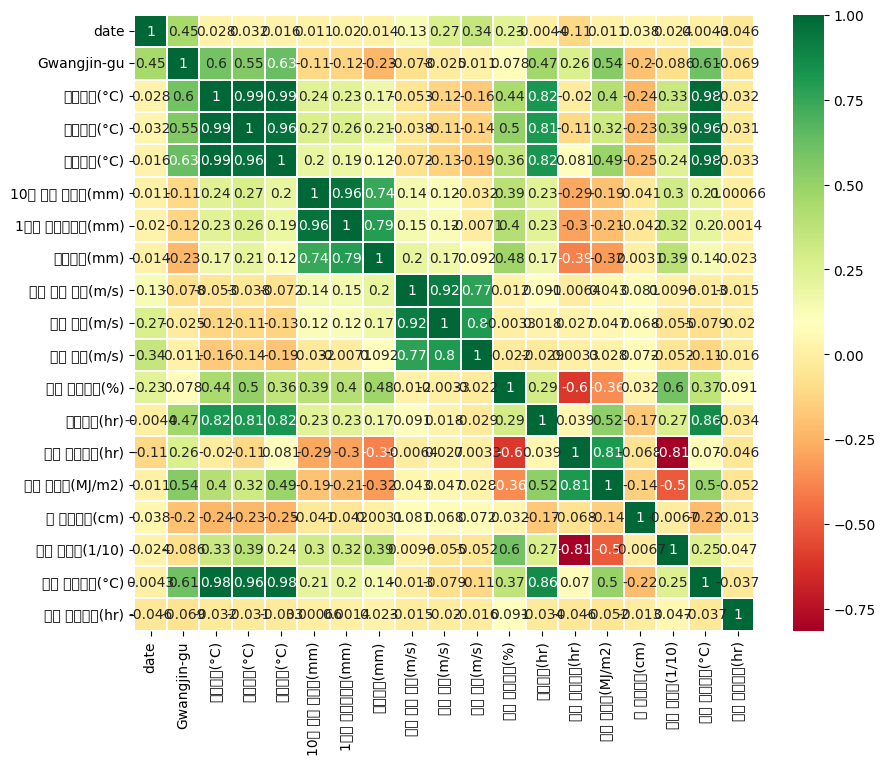

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [19]:
df.columns

Index(['date', 'Gwangjin-gu', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)',
       '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 풍속(m/s)', '평균 풍속(m/s)', '평균 상대습도(%)', '가조시간(hr)', '합계 일조시간(hr)',
       '합계 일사량(MJ/m2)', '일 최심적설(cm)', '평균 전운량(1/10)', '평균 지면온도(°C)',
       '안개 계속시간(hr)'],
      dtype='object')

In [20]:
df = df.drop(['평균기온(°C)', '최저기온(°C)', '10분 최다 강수량(mm)',
       '1시간 최다강수량(mm)', '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 풍속(m/s)', '일 최심적설(cm)', '평균 전운량(1/10)', '안개 계속시간(hr)', '평균 지면온도(°C)'],axis = 1)
df.head(5)

,date,Gwangjin-gu,최고기온(°C),평균 풍속(m/s),평균 상대습도(%),가조시간(hr),합계 일조시간(hr),합계 일사량(MJ/m2)
0,20180101,592,3.8,1.4,39.1,9.6,8.3,6.14
1,20180102,840,1.8,1.8,42.0,9.6,7.9,5.36
2,20180103,828,-0.4,2.2,42.3,9.7,8.6,6.56
3,20180104,792,-0.7,1.4,43.0,9.7,6.2,4.73
4,20180105,818,1.6,1.7,48.4,9.7,8.2,5.96


In [21]:
df.columns = ['date','Gwangjin-gu','temp','wind speed','hum','supplementary','sunshine duration','insolation']

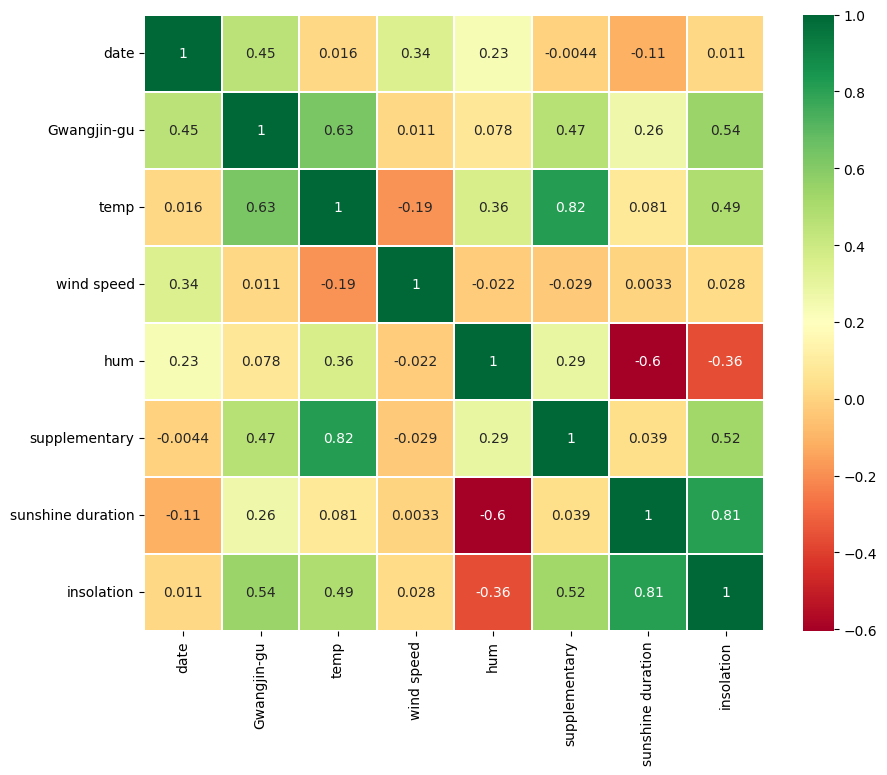

In [22]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [23]:
def get_outlier(df=None, column=None, weight=1.5):
      # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_15 = np.percentile(df[column].values, 25)
  quantile_85 = np.percentile(df[column].values, 75)

  IQR = quantile_85 - quantile_15
  IQR_weight = IQR*weight
  
  lowest = quantile_15 - IQR_weight
  highest = quantile_85 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [24]:
columns = ['date','Gwangjin-gu','temp','wind speed','hum','supplementary','sunshine duration','insolation']

for i in columns:
    outlier_idx = get_outlier(df=df, column=i, weight=1.5)
    df.drop(outlier_idx, axis=0, inplace=True)

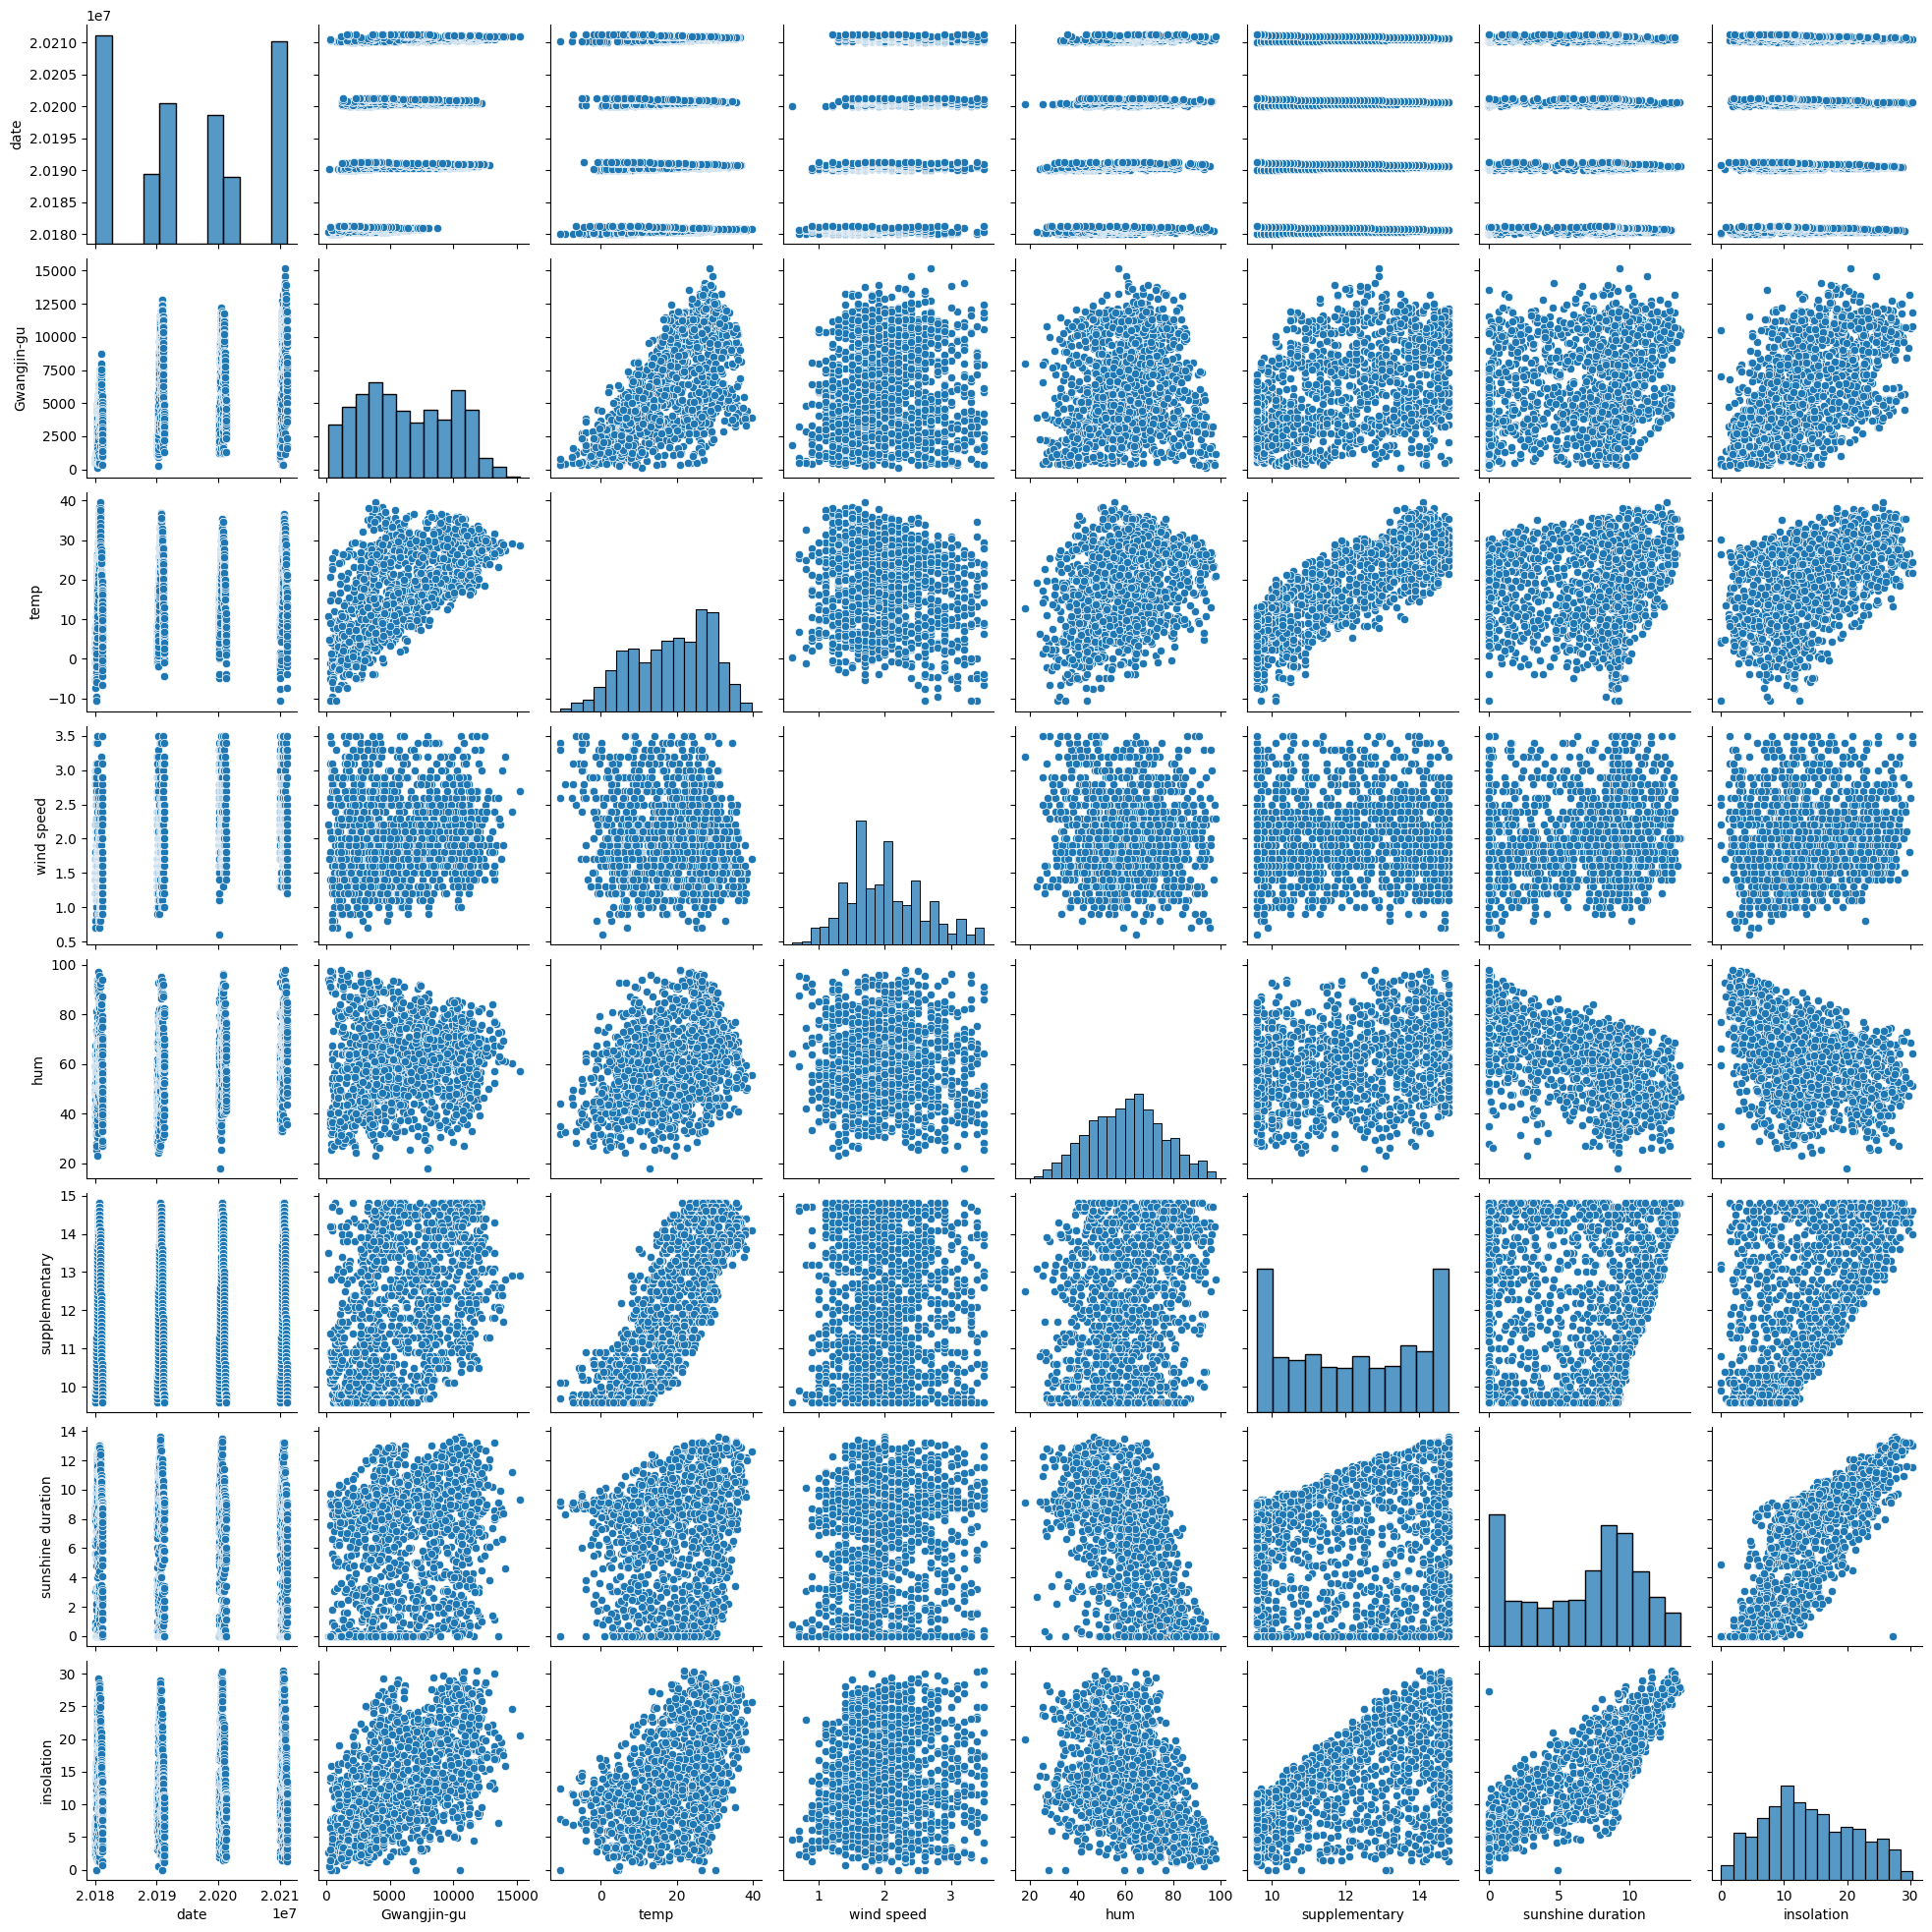

In [25]:
sns.pairplot(data=df)
plt.show()

In [28]:
df['date1'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['weekday'] = df['date1'].dt.weekday
df = df.drop(['date1'],axis=1)
df

,date,Gwangjin-gu,temp,wind speed,hum,supplementary,sunshine duration,insolation,weekday
0,20180101,592,3.8,1.4,39.1,9.6,8.3,6.14,0
1,20180102,840,1.8,1.8,42.0,9.6,7.9,5.36,1
2,20180103,828,-0.4,2.2,42.3,9.7,8.6,6.56,2
3,20180104,792,-0.7,1.4,43.0,9.7,6.2,4.73,3
4,20180105,818,1.6,1.7,48.4,9.7,8.2,5.96,4
...,...,...,...,...,...,...,...,...,...
1456,20211227,3830,-3.9,1.7,60.9,9.6,3.8,6.09,0
1457,20211228,4510,-0.9,2.2,73.8,9.6,1.7,4.32,1
1458,20211229,4490,5.9,2.6,72.9,9.6,1.8,4.64,2
1459,20211230,4444,0.2,3.3,48.5,9.6,7.3,9.14,3


In [29]:
data = df.drop('Gwangjin-gu', axis=1).values
target = df['Gwangjin-gu'].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
# from sklearn.tree import plot_tree
# rfTree= rf.estimators_[0]
# plot_tree(rfTree)
# plt.show()

RandomForestRegressor(random_state=1)

In [32]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9843447379099044
0.9077313206986467


※ RandomForest Regressor : 0.9024740954578279
- MAE : 753.266

In [33]:
pred = rf.predict(X_test)
mae = mean_absolute_error(y_test,pred)
print(f'MAE : {mae:.3f}')

MAE : 753.266
